# Dataset Demo

In [1]:
from PIL import Image
import pillow_avif
from zipp import Path as ZipPath
import io
import json

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 280
import numpy as np


In [2]:
import sys
sys.path.append('./demos/keypoints.py')
sys.path.append('./demos/mesh.py')
sys.path.append('./demos/segmentation.py')

import demos.keypoints, demos.mesh, demos.segmentation

### Image Sample

In [7]:
camera_id = '401875'
frame_id = 138233
num_frames = 138
ava_dir = "../../AVA_dataset_8TB/"
subject_id = "20230831--0814--ADL311"
base_dir = f"{ava_dir}/{subject_id}/decoder/"

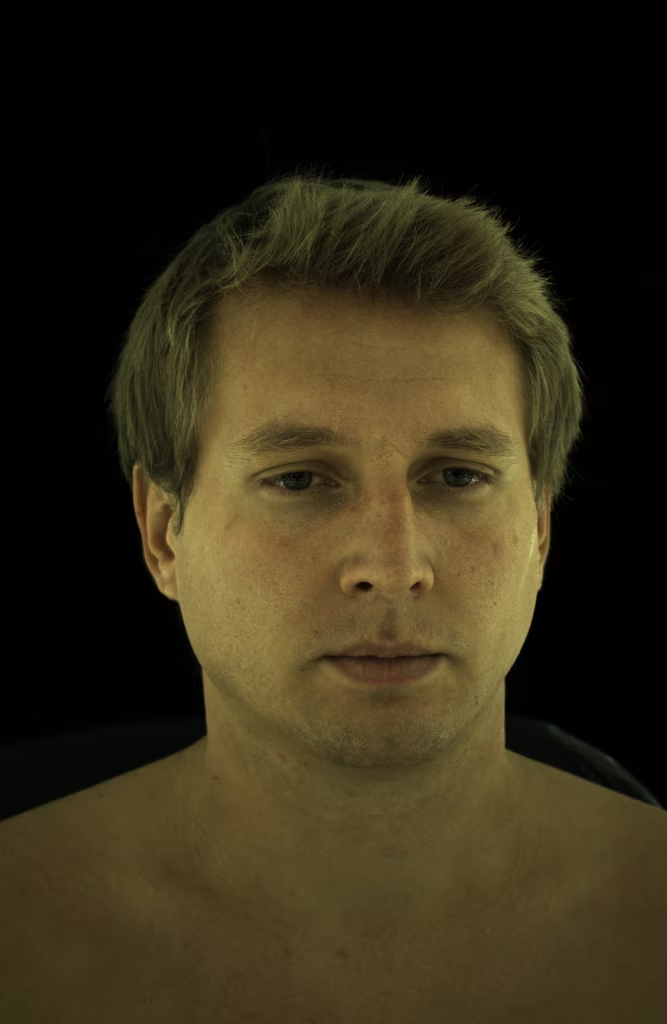

In [8]:
# base_dir = f"{ava_dir}/{subject_id}/decoder/"
path = ZipPath(
                base_dir + "image/" + f"cam{camera_id}.zip",
                f"cam{camera_id}/{int(start):06d}.avif",
            )
img_bytes = path.read_bytes()
image = Image.open(io.BytesIO(img_bytes))
display(image)

In [9]:
path = f"{base_dir}/camera_calibration.json"

with open(path, "rb") as f:
    camera_calibration = json.load(f)

for cam in camera_calibration['KRT']:
    if cam['cameraId'] == camera_id:
        intrin = np.array(cam['K']).T
        extrin = np.array(cam['T'])[:4, :3].T
        break

## Keypoints Demo

### Keypoints Projected on Image

In [10]:
i = -1
number = 0

while number < num_frames:
    i += 1
    try:
        demos.keypoints.plot_keypoints_on_image(ava_dir, subject_id, base_dir, camera_id, start+i, intrin, extrin, savefig=True)
        number += 1
    except:
        continue
        

# demos.keypoints.plot_keypoints_on_image(ava_dir, subject_id, base_dir, camera_id, frame_id, intrin, extrin, savefig=True)
    

### Keypoints in 3D

Loaded keypoints of shape (238, 6)


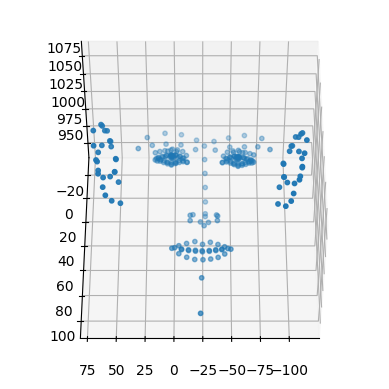

In [6]:
for frame_id in range(35665, 37000):
    try:
        demos.keypoints.plot_keypoints_3d(ava_dir, subject_id, base_dir, frame_id, elev=50, azim=90, roll=0, savefig=True)
    except:
        continue

## Mesh Demo

### Mesh Projection on 2D image

In [11]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 293

i = -1
number = 0

while number < num_frames:
    i += 1
    try:
        demos.mesh.plot_mesh_on_image(ava_dir, subject_id, base_dir, camera_id, start+i, intrin, extrin, savefig=True, showfig=False)
        number += 1
    except:
        continue


# demos.mesh.plot_mesh_on_image(ava_dir, subject_id, base_dir, camera_id, frame_id, savefig=True, showfig=False)

In [12]:
i = -1
number = 0

while number < num_frames:
    i += 1
    try:
        demos.mesh.plot_mesh_on_image(ava_dir, subject_id, base_dir, camera_id, start+i, intrin, extrin, savefig=True, showfig=False, with_keypoints=False)
        number += 1
    except:
        continue

### Mesh Visualization in 3D

In [5]:
demos.mesh.plot_mesh_3d(ava_dir, subject_id, base_dir, frame_id, elev=80, azim=90, roll=180, savefig=True)

## Segmentation demo

In [13]:
i = -1
number = 0

while number < num_frames:
    i += 1
    try:
        demos.segmentation.segmentation_demo(ava_dir, subject_id, base_dir, camera_id, start + i)
        number += 1
    except:
        continue

<img src="segmentation_example.apng" width="300" align="center">